# Max Actions per Turn

Having:

- Action points
- A weapon which costs action points per attack
- A weapon with a burst value (shots per action)
- Ammo limits on the weapon
- Reloading cost

## Setup

In [1]:
import pandas as pd
import math

from scripts.action import max_actions

## Max Number of Attacks per Turn

We want to know:

- How many times can it attack in a single turn

For that we will define:

- A limit of action points per turn

### Example: X-Com rifle

Info:

- Percentile system
- Ammo 20
- 25 points single shot
- 35 points burst of three shot
- 15 points to reload

Single shot.

In [2]:
max_actions(100, 25, 15, 20)

4

Burst shot.

In [3]:
max_actions(100, 25, 15, 20) * 3

12

### Example: X-Com rocket launcher

Info:

- Percentile system
- Ammo 1
- 45 points single shot
- 15 points to reload

In [4]:
max_actions(100, 45, 15, 1)

1

Notice that it can't shoot twice, due to the cost of reloading.

We can see this if we reduce the reloading cost so shooting twice takes a full turn.

In [5]:
max_actions(100, 45, 5, 1)

2

### Example: X-Com laser pistol

Info:

- Infinite ammo
- Percentile system
- 20 points single shot
- 15 points to reload

In [6]:
max_actions(100, 20, 15, math.inf)

5

## Max Number of Attacks Based on Available Points

### Example: X-Com rifle

Info:

- Percentile system
- Ammo 20
- 25 points single shot
- 15 points to reload

In [7]:
values = []
for i in range(0, 101, 1):
    values.append(i)
d = {"value": values}
df = pd.DataFrame(data=d)

In [8]:
df["chance"] = df.apply(lambda x: max_actions(x["value"], 25, 15, 20), axis=1)
df["chance"] = pd.to_numeric(df["chance"])

Text(0, 0.5, 'Actions')

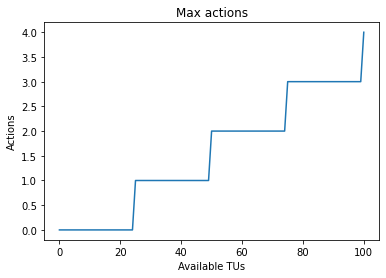

In [9]:
ax = df.plot(title="Max actions", x="value", legend=False)
ax.set_xlabel("Available TUs")
ax.set_ylabel("Actions")

### Example: X-Com Weapon With Two Shots

Info:

- Percentile system
- Ammo 2
- 25 points single shot
- 15 points to reload

In [10]:
values = []
for i in range(0, 101, 5):
    values.append(i)
d = {"value": values}
df = pd.DataFrame(data=d)

In [11]:
df["chance"] = df.apply(lambda x: max_actions(x["value"], 20, 15, 2), axis=1)
df["chance"] = pd.to_numeric(df["chance"])

Text(0, 0.5, 'Actions')

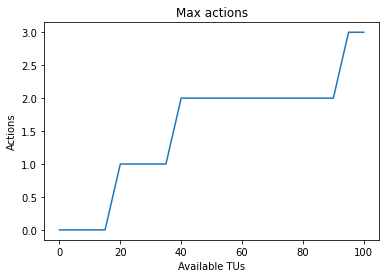

In [12]:
ax = df.plot(title="Max actions", x="value", legend=False)
ax.set_xlabel("Available TUs")
ax.set_ylabel("Actions")